In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/mckim/Key/shine-mobiledodctor-xxx.json"

In [2]:
from google.cloud import aiplatform

In [3]:
REGION = "asia-northeast3"  # @param {type:"string"}
MODEL_ARTIFACT_DIR = "shinev3_6_benchmarks"  # @param {type:"string"}
REPOSITORY = "repository_gongsil"  # @param {type:"string"}
IMAGE = "image_gongsil"  # @param {type:"string"}
MODEL_NAME = "model_gongsil"  # @param {type:"string"}
VERSION_NAME = "v14"  # @param {type:"string"}
PROJECT_ID = "shine-mobiledoctor"


In [5]:
BUCKET_NAME = "gs://shine_v3_7_kt"  # @param {type:"string"}

In [11]:
from google.cloud import automl_v1


In [11]:

from google.cloud import aiplatform
from google.cloud import storage

def get_model_evaluation_tabular_classification_sample(
    project: str,
    model_id: str,
    evaluation_id: str,
    location: str = "asia-northeast3",
    api_endpoint: str = "asia-northeast3-aiplatform.googleapis.com",
):
    """
    To obtain evaluation_id run the following commands where LOCATION
    is the region where the model is stored, PROJECT is the project ID,
    and MODEL_ID is the ID of your model.

    model_client = aiplatform.gapic.ModelServiceClient(
        client_options={
            'api_endpoint':'LOCATION-aiplatform.googleapis.com'
            }
        )
    evaluations = model_client.list_model_evaluations(parent='projects/PROJECT/locations/LOCATION/models/MODEL_ID')
    print("evaluations:", evaluations)
    """
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.ModelServiceClient(client_options=client_options)
    name = client.model_evaluation_path(
        project=project, location=location, model=model_id, evaluation=evaluation_id
    )
    response = client.get_model_evaluation(name=name)
    return response


response = get_model_evaluation_tabular_classification_sample(
    project='shine-mobiledodctor',
    model_id='2243549078430416896',
    evaluation_id='788217648065358440',
)

In [12]:
import pandas as pd
df_features = pd.DataFrame()

In [13]:
response

name: "projects/808088489496/locations/asia-northeast3/models/2243549078430416896@1/evaluations/788217648065358440"
metrics_schema_uri: "gs://google-cloud-aiplatform/schema/modelevaluation/classification_metrics_1.0.0.yaml"
metrics {
  struct_value {
    fields {
      key: "logLoss"
      value {
        number_value: 0.38495588
      }
    }
    fields {
      key: "confusionMatrix"
      value {
        struct_value {
          fields {
            key: "rows"
            value {
              list_value {
                values {
                  list_value {
                    values {
                      number_value: 2241
                    }
                    values {
                      number_value: 385
                    }
                  }
                }
                values {
                  list_value {
                    values {
                      number_value: 322
                    }
                    values {
                      number_val

In [65]:
for i, ele in enumerate(response.model_explanation.mean_attributions):
    print("***", i)
    for key, val in ele.feature_attributions.items():
        df_features.loc[key, 'attributions'] = val
df_features.sort_values('attributions', ascending=False)

*** 0


attributions
sputum                                               0.078288
confirmed_ratio                                      0.077331
sore_throat                                          0.057234
global_confirmed_ratio                               0.055042
cough                                                0.040279
runny_nose                                           0.030539
weekday                                              0.027263
age_ratio                                            0.025212
chills                                               0.020903
gender                                               0.020398
fever                                                0.020373
total_cases_per_million_for_6months_norm             0.019625
sigungu_confirmed_ratio                              0.011874
total_deaths_per_million_for_6months_norm            0.010864
muscle_pain                                          0.007917
loss_of_taste                                        0.006777
head_ache                                            0.004848
loss_of_smell                                        0.003290
total_deaths_per_million_for_6months_mask            0.003093
total_vaccinations_per_hundred_for_6months_norm      0.002783
total_cases_per_million_for_6months_mask             0.002738
indication_abroad                                    0.002009
total_vaccinations_per_hundred_for_6months_mask      0.001543
shortness_of_breath                                  0.001147
indication_other                                     0.001074
chest_pain                                           0.000316
indication_contact                                   0.000000
sigungu_confirmed_mask                               0.000000

In [48]:
dir(ele)

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'approximation_error',
 'baseline_output_value',
 'feature_attributions',
 'instance_output_value',
 'output_display_name',
 'output_index',
 'output_name']

total_deaths_per_million_for_6months_norm 0.010864496445597225
indication_other 0.0010744799052520542
runny_nose 0.030538855156777154
muscle_pain 0.007916675020541023
sore_throat 0.05723364385022405
confirmed_ratio 0.0773309715617529
sigungu_confirmed_ratio 0.011873966565451003
cough 0.0402788885214486
weekday 0.027263179676443712
chest_pain 0.00031607359209025453
chills 0.02090312398405637
fever 0.020373287711670775
total_deaths_per_million_for_6months_mask 0.003092633927519242
total_cases_per_million_for_6months_norm 0.019624868672165934
total_cases_per_million_for_6months_mask 0.0027381787988342917
total_vaccinations_per_hundred_for_6months_norm 0.002783487821048219
indication_contact 0.0
global_confirmed_ratio 0.055041818673746884
age_ratio 0.025212416731428072
shortness_of_breath 0.0011470670642465344
sputum 0.0782884612519223
loss_of_taste 0.006776563827486349
indication_abroad 0.0020091303650276605
sigungu_confirmed_mask 0.0
loss_of_smell 0.003290138135094831
gender 0.0203984905

In [33]:
metrics = response.metrics
for key, val in metrics.items():
    if type(val) in [float, str, int]:
        print(key, val)
    else:
        print(key, 'object')

auPrc 0.90562356
auRoc 0.9083472
logLoss 0.38495588
confusionMatrix object
confidenceMetrics object


In [32]:
for key, val in metrics['confusionMatrix'].items():
    print(key, val)

rows [[2241.0, 385.0], [322.0, 1324.0]]
annotationSpecs [<proto.marshal.collections.maps.MapComposite object at 0x11b505760>, <proto.marshal.collections.maps.MapComposite object at 0x11b505ac0>]


In [23]:
for ele in metrics['confidenceMetrics']:
    print(ele)
    
    for key, val in ele.items():
        print(key, val)

f1ScoreAt1 0.83450377
precision 0.5
recallAt1 0.83450377
falsePositiveRateAt1 0.16549626
truePositiveCount 4272
recall 1.0
confidenceThreshold -0.005
falsePositiveRate 1.0
precisionAt1 0.83450377
falsePositiveCount 4272
confusionMatrix <proto.marshal.collections.maps.MapComposite object at 0x10f0c1850>
f1Score 0.6666667
f1ScoreAt1 0.83450377
precision 0.5
recallAt1 0.83450377
falsePositiveRateAt1 0.16549626
truePositiveCount 4272
recall 1.0
falsePositiveRate 1.0
precisionAt1 0.83450377
falsePositiveCount 4272
confusionMatrix <proto.marshal.collections.maps.MapComposite object at 0x10f0c16d0>
f1Score 0.6666667
f1ScoreAt1 0.83450377
precision 0.5004686
recallAt1 0.83450377
falsePositiveRateAt1 0.16549626
truePositiveCount 4272
recall 1.0
trueNegativeCount 8
confidenceThreshold 0.005
falsePositiveRate 0.99812734
precisionAt1 0.83450377
falsePositiveCount 4264
confusionMatrix <proto.marshal.collections.maps.MapComposite object at 0x10f0c16d0>
f1Score 0.6670831
falseNegativeCount 3
recallAt

In [84]:
from google.cloud import storage

bucket_name = 'shine_v3_6_kt'

client = storage.Client()
bucket = client.get_bucket(bucket_name)

In [82]:

# Set up bucket name and file path
bucket_name = 'shine_v3_6_kt'
csv_file_path = '../pipeline/output/israeli_result.csv'

# Upload file to bucket
blob = bucket.blob(file_path)
blob.upload_from_filename(file_path)

<Blob: shine_v3_6_kt, automl_dataset/, 1681666950799874>
<Blob: shine_v3_6_kt, automl_result/, 1681629661457958>
<Blob: shine_v3_6_kt, df_all.csv, 1681510129618665>
<Blob: shine_v3_6_kt, df_all_added_owid.csv, 1681510129773306>
<Blob: shine_v3_6_kt, df_all_added_owid_loc.csv, 1681510130192191>
<Blob: shine_v3_6_kt, df_test_v3_6.csv, 1681275466581375>
<Blob: shine_v3_6_kt, df_train_v3_6.csv, 1681275466658619>
<Blob: shine_v3_6_kt, df_valid_v3_6.csv, 1681275466552642>
<Blob: shine_v3_6_kt, gps_full_2023-03-22_norm.csv, 1681510156393770>
<Blob: shine_v3_6_kt, pp_params/loc_std_norm.png, 1681510140602367>
<Blob: shine_v3_6_kt, pp_params/loc_std_qt.pkl, 1681510136148042>
<Blob: shine_v3_6_kt, pp_params/n_norm.png, 1681510138379882>
<Blob: shine_v3_6_kt, pp_params/n_qt.pkl, 1681510136196095>
<Blob: shine_v3_6_kt, pp_params/path_sum_norm.png, 1681510140481459>
<Blob: shine_v3_6_kt, pp_params/path_sum_qt.pkl, 1681510138552793>


In [83]:
dir(blob)

['STORAGE_CLASSES',
 '_CHUNK_SIZE_MULTIPLE',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_acl',
 '_bucket',
 '_changes',
 '_chunk_size',
 '_do_download',
 '_do_multipart_upload',
 '_do_resumable_upload',
 '_do_upload',
 '_encryption_headers',
 '_encryption_key',
 '_extract_headers_from_download',
 '_get_content_type',
 '_get_download_url',
 '_get_transport',
 '_get_upload_arguments',
 '_get_writable_metadata',
 '_initiate_resumable_upload',
 '_patch_property',
 '_properties',
 '_query_params',
 '_require_client',
 '_set_properties',
 'acl',
 'bucket',
 'cache_control',
 'chunk_size',
 'client',
 'component_count',
 'compose',
 'content_disposition',
 'content_enco

In [87]:
from parse import parse

In [90]:
GS_ADDR_TEMPLATE = "gs://{bucket_name}/df_automl_{dataset_name}.csv"
gc_path = "gs://shine_v3_6_kt/df_automl_patientplussi6_manual.csv"
ret = parse(GS_ADDR_TEMPLATE, gc_path)


'shine_v3_6_kt'

In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/mckim/Key/shine-mobiledodctor-xxx.json"


In [2]:

from google.cloud import aiplatform
from google.cloud import storage
import pandas as pd
from parse import parse
from datetime import datetime

In [3]:

datasets = aiplatform.TabularDataset.list()
for ds in datasets:
    print(ds)



In [5]:
datasets

[]

In [ ]:
'automl_dataset_df_automl_patientpluslocplussi6plusowid_manual_nofillna'

In [146]:
project_name = 'shine-mobiledodctor'
region = 'asia-northeast3'


In [178]:

# Load tabluear dataset
list_ds = aiplatform.TabularDataset.list(
#     filter='display_name="shine_tableform_v3_7_manual_patientpluslocplussi6plusowid_manual_fillna"', 
    location=region,
)

assert list_ds

for ds in list_ds:
    print(ds.display_name)

shine_tableform_v3_6_manual_patientpluslocplussi6plusowid_manual_nofillna
shine_tableform_v3_6_manual_patientpluslocplussi6plusowid_manual_nofillna
shine_tableform_v3_6_manual_patientplusscreason_manual_onlyscfirstTrue_20230418
shine_tableform_v3_6_manual_patientpluslocplussi6plusowid_manual_20230416
shine_tableform_v3_6_manual_patient_manual_20230416
shine_tableform_v3_6_manual_patientplusowid_manual_20230416
shine_tableform_v3_6_manual_patientplusloc_manual_20230416
shine_tableform_v3_6_manual_patientplussi6_manual_20230416
shine_tableform_v3_6_manual_split_patient_si6_20230416
shine_tableform_v3_6_manual_split_patient_loc_20230416
shine_tableform_v3_6_manual_split_owid_loc_20230416
shine_tableform_v3_6_manual_split_owid_loc_1679030506841
shine_tableform_v3_12_manual_split_added_owid_with_mask_1679030506841
shine_tableform_v3_12_manual_split_added_owid_1679000769538
shine_tableform_v3_12_manual_split_1678564791400
shine_tableform_v3_12_1678562954810
practice_dataset
surveillance_data

In [166]:
print(ds.resource_name)

projects/808088489496/locations/asia-northeast3/datasets/5795499401728229376


In [124]:
# dataset_id = '5795499401728229376'
# ds = aiplatform.TabularDataset(f'projects/{project_name}/locations/{region}/datasets/{dataset_id}')
# ds

resource name: projects/808088489496/locations/asia-northeast3/datasets/5795499401728229376

In [170]:
ds.display_name

'shine_tableform_v3_6_manual_patientpluslocplussi6plusowid_manual_nofillna'

In [171]:
ds.column_names

['hosp_patients_per_million_norm',
 'loss_of_smell',
 'total_vaccinations_per_hundred_for_6months_norm',
 'total_deaths_per_million_norm',
 'indication_other',
 'n_norm_6',
 'loc_std_norm_6',
 'sore_throat',
 'loc_std_norm_4',
 'new_cases_smoothed_per_million_norm',
 'n_norm_3',
 'total_cases_per_million_norm',
 'indication_contact',
 'hospital_beds_per_thousand_norm',
 'path_sum_norm_5',
 'path_sum_norm_4',
 'head_ache',
 'loc_std_norm_5',
 'excess_mortality_cumulative_per_million_norm',
 'loc_std_norm_3',
 'sputum',
 'runny_nose',
 'n_norm_5',
 'path_sum_norm_6',
 'loc_std_norm_1',
 'loss_of_taste',
 'sigungu_confirmed_ratio',
 'new_vaccinations_smoothed_per_million_norm',
 'path_sum_norm_1',
 'age_ratio',
 'loc_std_norm_2',
 'new_tests_smoothed_per_thousand_norm',
 'weekly_icu_admissions_per_million_norm',
 'people_vaccinated_per_hundred_norm',
 'split',
 'n_norm_2',
 'fever',
 'gender',
 'pcr_result',
 'shortness_of_breath',
 'n_norm_4',
 'muscle_pain',
 'indication_abroad',
 'conf

In [172]:
col_spec_auto = job.get_auto_column_specs(ds, target_column='pcr_result')
len(col_spec_auto)

## Don't forget remove patient_id and split

68

In [173]:

class column_data_types:
    AUTO = "auto"
    NUMERIC = "numeric"
    CATEGORICAL = "categorical"
    TIMESTAMP = "timestamp"
    TEXT = "text"
    REPEATED_NUMERIC = "repeated_numeric"
    REPEATED_CATEGORICAL = "repeated_categorical"
    REPEATED_TEXT = "repeated_text"



Column specs: 66


In [129]:
job = aiplatform.AutoMLTabularTrainingJob(
    display_name = ds.display_name,
    optimization_prediction_type = 'classification',
    optimization_objective = 'maximize-au-roc',
    column_specs = column_specs,
#     column_transformations: Optional[List[Dict[str, Dict[str, str]]]] = None,
#     optimization_objective_recall_value: Optional[float] = None,
#     optimization_objective_precision_value: Optional[float] = None,
    project = project_name,
    location = region,
#     credentials: Optional[google.auth.credentials.Credentials] = None,
#     labels: Optional[Dict[str, str]] = None,
#     training_encryption_spec_key_name: Optional[str] = None,
#     model_encryption_spec_key_name: Optional[str] = None,
)

In [130]:
model = job.run(
    dataset = ds,
    target_column= 'pcr_result',
#     training_fraction_split: Optional[float] = None,
#     validation_fraction_split: Optional[float] = None,
#     test_fraction_split: Optional[float] = None,
    predefined_split_column_name = 'split',
#     timestamp_split_column_name: Optional[str] = None,
#     weight_column: Optional[str] = None,
    budget_milli_node_hours= 1000,
#     model_display_name: Optional[str] = None,
#     model_labels: Optional[Dict[str, str]] = None,
#     model_id: Optional[str] = None,
#     parent_model: Optional[str] = None,
#     is_default_version: Optional[bool] = True,
#     model_version_aliases: Optional[Sequence[str]] = None,
#     model_version_description: Optional[str] = None,
    disable_early_stopping = False,
#     export_evaluated_data_items: bool = False,
#     export_evaluated_data_items_bigquery_destination_uri: Optional[str] = None,
#     export_evaluated_data_items_override_destination: bool = False,
#     additional_experiments: Optional[List[str]] = None,
    sync = False,
#     create_request_timeout: Optional[float] = None,
)

View Training:
https://console.cloud.google.com/ai/platform/locations/asia-northeast3/training/552583757794639872?project=808088489496
AutoMLTabularTrainingJob projects/808088489496/locations/asia-northeast3/trainingPipelines/552583757794639872 current state:
PipelineState.PIPELINE_STATE_RUNNING
AutoMLTabularTrainingJob projects/808088489496/locations/asia-northeast3/trainingPipelines/552583757794639872 current state:
PipelineState.PIPELINE_STATE_RUNNING
AutoMLTabularTrainingJob projects/808088489496/locations/asia-northeast3/trainingPipelines/552583757794639872 current state:
PipelineState.PIPELINE_STATE_RUNNING
AutoMLTabularTrainingJob projects/808088489496/locations/asia-northeast3/trainingPipelines/552583757794639872 current state:
PipelineState.PIPELINE_STATE_RUNNING
AutoMLTabularTrainingJob projects/808088489496/locations/asia-northeast3/trainingPipelines/552583757794639872 current state:
PipelineState.PIPELINE_STATE_RUNNING
AutoMLTabularTrainingJob projects/808088489496/location

In [131]:
model.to_dict()

{'name': 'projects/808088489496/locations/asia-northeast3/models/7365267754657513472@1',
 'displayName': 'shine_tableform_v3_6_manual_patientpluslocplussi6plusowid_manual_nofillna',
 'predictSchemata': {'instanceSchemaUri': 'https://storage.googleapis.com/caip-tenant-09519a57-1169-4992-9efa-32e7d10f4461/schema/predict/instance.yaml?GoogleAccessId=service-808088489496@gcp-sa-aiplatform.iam.gserviceaccount.com&Expires=1681882821&Signature=cpiS7KNQcpxfKqxQAUJzGL7mOz%252F6ERE4XBvGSqDfuxxgZbCZcOzxUXPhZp9Q772ZUKAAquF3WLUCrKtLVyX5ga%252FoDf5l%252FfcoLxkrTkhEBVFXaUjHroXB3VagP%252BQf8oMGgbuM0NXVZ2Qf6kW70D3pYfq0RtHrAau7SSHvuoaHAZpcPMY3JWgb4mOcq7k6n1dUMhLuNDjtOhW1h554L1uRa1Sdzh7uJ5ukIbV0VAaAs6bQTk01Xv54bSaIfH5Lkz3OhV4GB%252BJuXwW0W3fMCkbVESUIz41OkStmNZQaA8qV%252Bw8lGGoBHlFZSXKf4VW%252FJAY7Sd%252Bryop26%252BhGg8SkM9krrQ%253D%253D',
  'predictionSchemaUri': 'https://storage.googleapis.com/caip-tenant-09519a57-1169-4992-9efa-32e7d10f4461/schema/predict/prediction.yaml?GoogleAccessId=service-80808848

In [14]:
res = model.get_model_evaluation()

NameError: name 'model' is not defined

In [ ]:
mean_attr = res.to_dict()['modelExplanation']['meanAttributions']
shapey_values = mean_attr[0]['featureAttributions']
df_features = pd.DataFrame()
for key, val in shapey_values['featureAttributions'].items():
    df_features.loc[key, 'attributions'] = val

In [ ]:
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

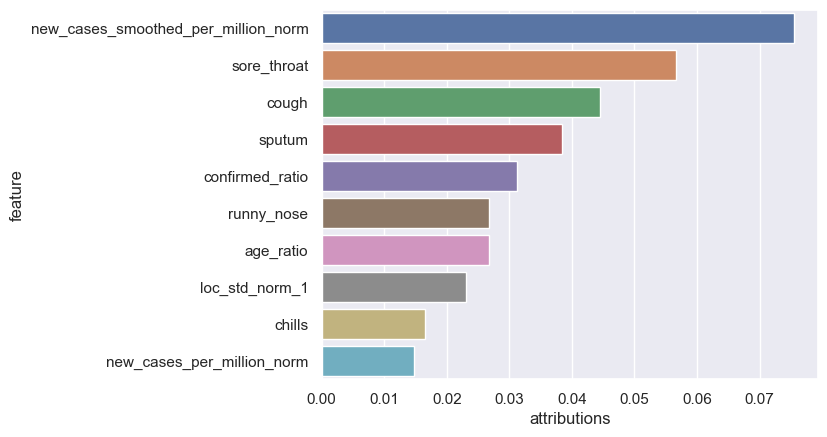

In [142]:

df_features['feature'] = df_features.index
sns.barplot(data=df_features.sort_values('attributions', ascending=False).head(10), x='attributions', y='feature')
plt.show()

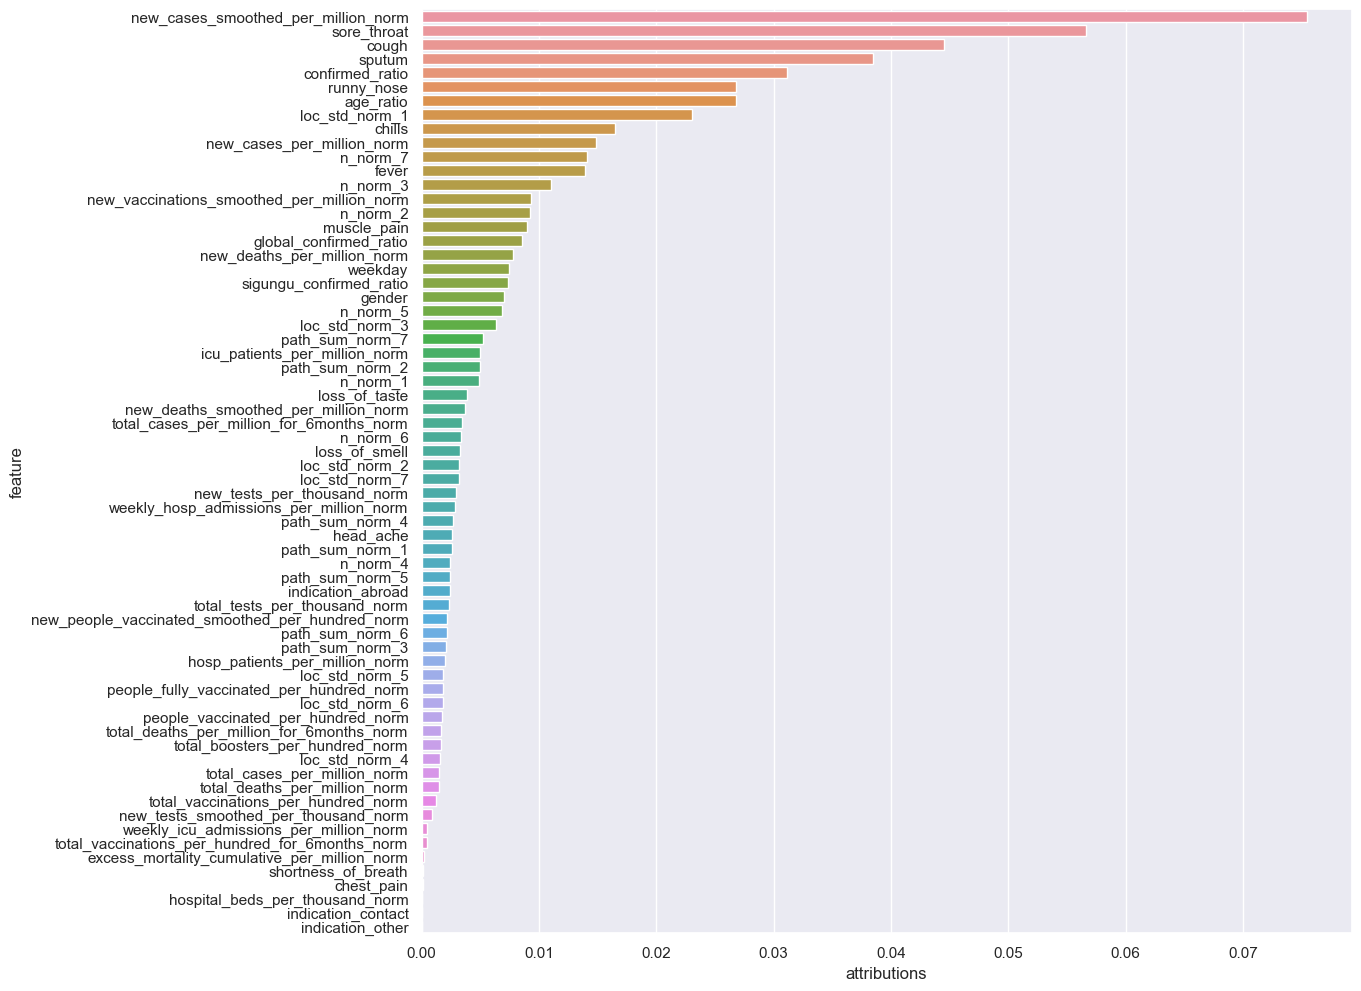

In [145]:
plt.figure(figsize=(12,12))
df_features['feature'] = df_features.index
sns.barplot(data=df_features.sort_values('attributions', ascending=False), x='attributions', y='feature')
plt.show()

In [46]:
eval_result.metrics

In [34]:
eval_result.model_explanation.mean_attributions.to_dict()


AttributeError: 'ModelEvaluation' object has no attribute 'model_explanation'

In [1]:

import os
from datetime import datetime

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/mckim/Key/shine-mobiledodctor-xxx.json"


In [2]:

import pandas as pd
from google.cloud import aiplatform
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

config = None


In [3]:
location = "asia-northeast3"
api_endpoint = "asia-northeast3-aiplatform.googleapis.com"

# The AI Platform services require regional API endpoints.
client_options = {"api_endpoint": api_endpoint}
# Initialize client that will be used to create and send requests.
# This client only needs to be created once, and can be reused for multiple requests.
client = aiplatform.gapic.ModelServiceClient(client_options=client_options)


In [4]:
dir(client)

['DEFAULT_ENDPOINT',
 'DEFAULT_MTLS_ENDPOINT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_default_mtls_endpoint',
 '_transport',
 'batch_import_evaluated_annotations',
 'batch_import_model_evaluation_slices',
 'cancel_operation',
 'common_billing_account_path',
 'common_folder_path',
 'common_location_path',
 'common_organization_path',
 'common_project_path',
 'copy_model',
 'delete_model',
 'delete_model_version',
 'delete_operation',
 'endpoint_path',
 'export_model',
 'from_service_account_file',
 'from_service_account_info',
 'from_service_account_json',
 'get_iam_policy',
 'get_location',
 'get_model',
 'get_model_evaluation'

In [5]:
models = client.list_models()
models

InvalidArgument: 400 Invalid resource field value in the request. [reason: "RESOURCE_PROJECT_INVALID"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "aiplatform.googleapis.com"
}
metadata {
  key: "method"
  value: "google.cloud.aiplatform.v1.ModelService.ListModels"
}
]

In [ ]:

name = client.model_evaluation_path(
    project=project, location=location, model=model_id, evaluation=evaluation_id
)
response = client.get_model_evaluation(name=name)
# print("response:", response)
metrics = response.metrics()
print(metrics)
